In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 腐蚀就是"变瘦"，膨胀就是"变胖"

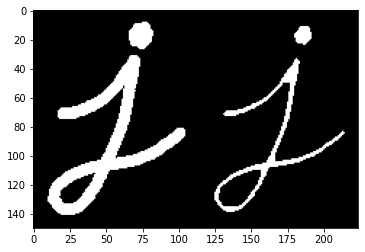

In [3]:
# 腐蚀
# 原理是在原图的小区域内取局部最小值
img = cv2.imread('j.bmp', 0)
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel)  # 腐蚀
plt.imshow(np.hstack((img, erosion)), 'gray')
plt.show()

In [4]:
# 这个核也叫结构元素，因为形态学操作其实也是应用卷积来实现的。
# 结构元素可以是矩形/椭圆/十字形，可以用cv2.getStructuringElement()
# 来生成不同形状的结构元素，比如：
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))  # 矩形结构
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))  # 椭圆结构
# kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))  # 十字形结构

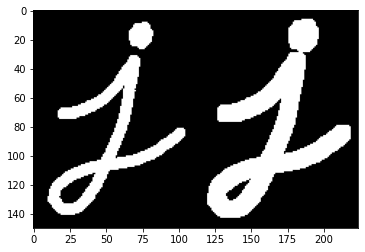

In [5]:
# 膨胀
img = cv2.imread('j.bmp', 0)
kernel = np.ones((5, 5), np.uint8)
dilate = cv2.dilate(img, kernel)  # 膨胀
plt.imshow(np.hstack((img, dilate)), 'gray')
plt.show()

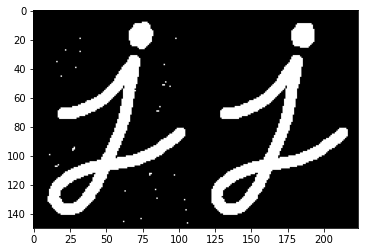

In [6]:
# 开运算
# 先腐蚀后膨胀叫开运算（因为先腐蚀会分开物体，这样容易记住）
# 其作用是：分离物体，消除小区域。
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))  # 定义结构
img = cv2.imread('j_noise_out.bmp', 0)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.imshow(np.hstack((img, opening)), 'gray')
plt.show()

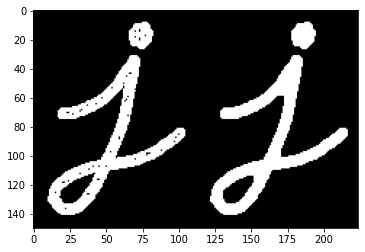

In [7]:
# 闭运算
# 闭运算则相反：先膨胀后腐蚀（先膨胀会使白色的部分扩张，以至于消除"闭合"物体里面的小黑洞，所以叫闭运算）
img = cv2.imread('j_noise_in.bmp', 0)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel) 
plt.imshow(np.hstack((img, closing)), 'gray')
plt.show()

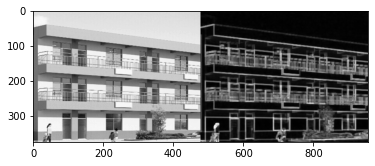

In [8]:
# 形态学梯度
# 膨胀图减去腐蚀图，dilation - erosion，这样会得到物体的轮廓
img = cv2.imread('school.bmp', 0)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(np.hstack((img, gradient)), 'gray')
plt.show()

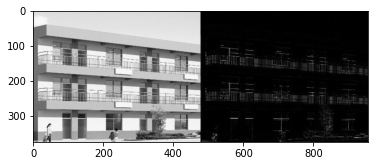

In [9]:
# 顶帽：原图减去开运算后的图：src - opening
img = cv2.imread('school.bmp', 0)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
plt.imshow(np.hstack((img, tophat)), 'gray')
plt.show()

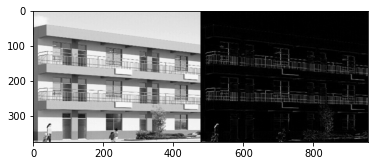

In [10]:
# 黑帽：闭运算后的图减去原图：closing - src
img = cv2.imread('school.bmp', 0)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(np.hstack((img, blackhat)), 'gray')
plt.show()